# Title Placeholder
## Introduction

## Preliminary exploratory data analysis

## Methods

## Expected outcomes and significance



# Code Section

In [16]:
library(tidyverse)
library(tidymodels)
set.seed(1234569)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



In [61]:
credit_csv <- read_csv("data/credit_score.csv")

Rows: 1000 Columns: 87
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): CUST_ID, CAT_GAMBLING
dbl (85): INCOME, SAVINGS, DEBT, R_SAVINGS_INCOME, R_DEBT_INCOME, R_DEBT_SAV...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Predictiing Credit Score based only off of Income, Savings, Debt

In [64]:
# colnames(credit_score)
credit_score <- select(credit_csv, INCOME, SAVINGS, DEBT, CREDIT_SCORE)
# credit_score <- filter(credit_score, !(INCOME == 0 | SAVINGS == 0 | DEBT == 0))
# credit_score

Splitting Training & Testing Data

In [66]:
credit_split <- initial_split(credit_score, 0.75, strata = CREDIT_SCORE)
credit_training <- training(credit_split)
credit_testing <- testing(credit_split)
# credit_training
# credit_testing

Summary of Training Data

In [67]:
credit_summary <- summarize(credit_training, 
                            avg_income = mean(INCOME), 
                            avg_savings = mean(SAVINGS), 
                            avg_debt = mean(DEBT),
                            avg_credit = mean(CREDIT_SCORE))
credit_summary

avg_income,avg_savings,avg_debt,avg_credit
<dbl>,<dbl>,<dbl>,<dbl>
119202.8,410248.5,769143.3,586.3525


Generating Graphs for the 3 different predictor values

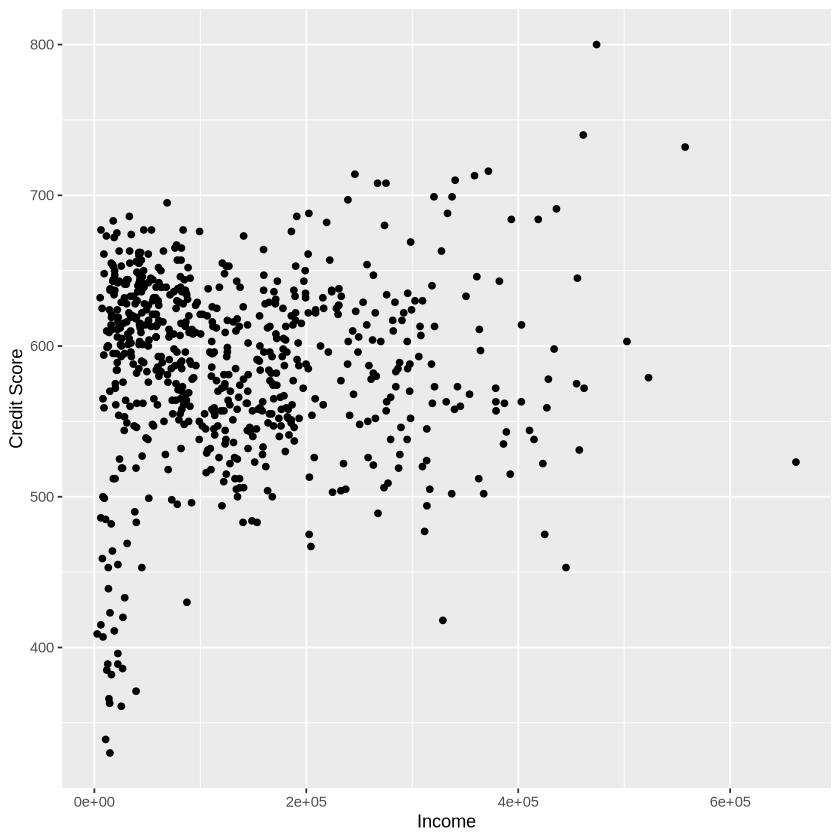

In [56]:
plot_income <- ggplot(credit_training, aes(x = INCOME, y = CREDIT_SCORE)) +
    geom_point() +
    labs(x = "Income",
         y = "Credit Score")
plot_income

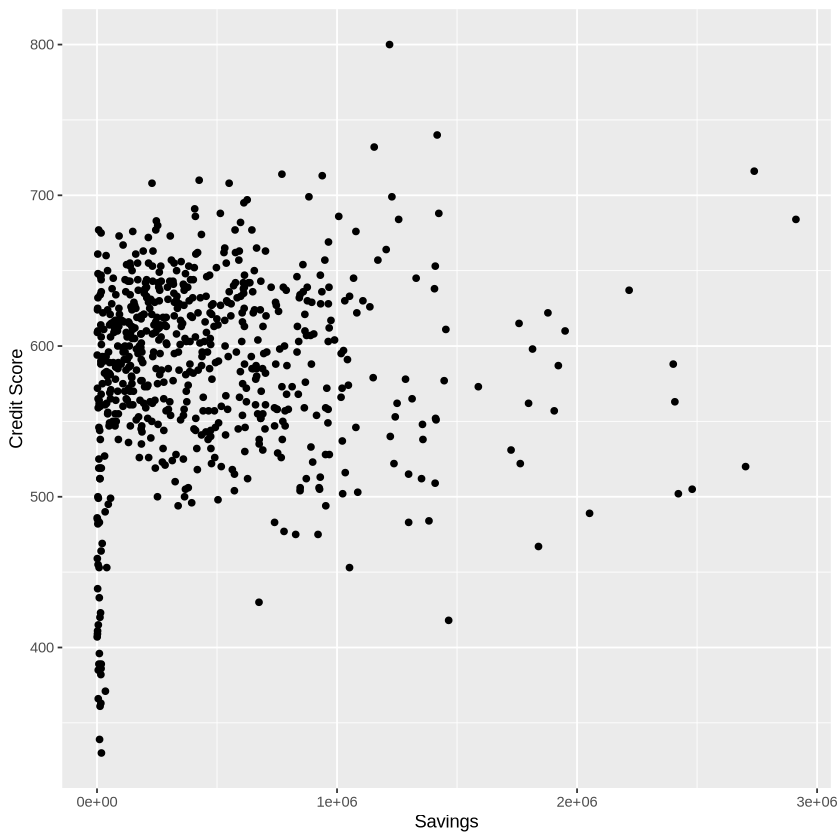

In [57]:
plot_savings <- ggplot(credit_training, aes(x = SAVINGS, y = CREDIT_SCORE)) +
    geom_point() +
    labs(x = "Savings",
         y = "Credit Score")
plot_savings

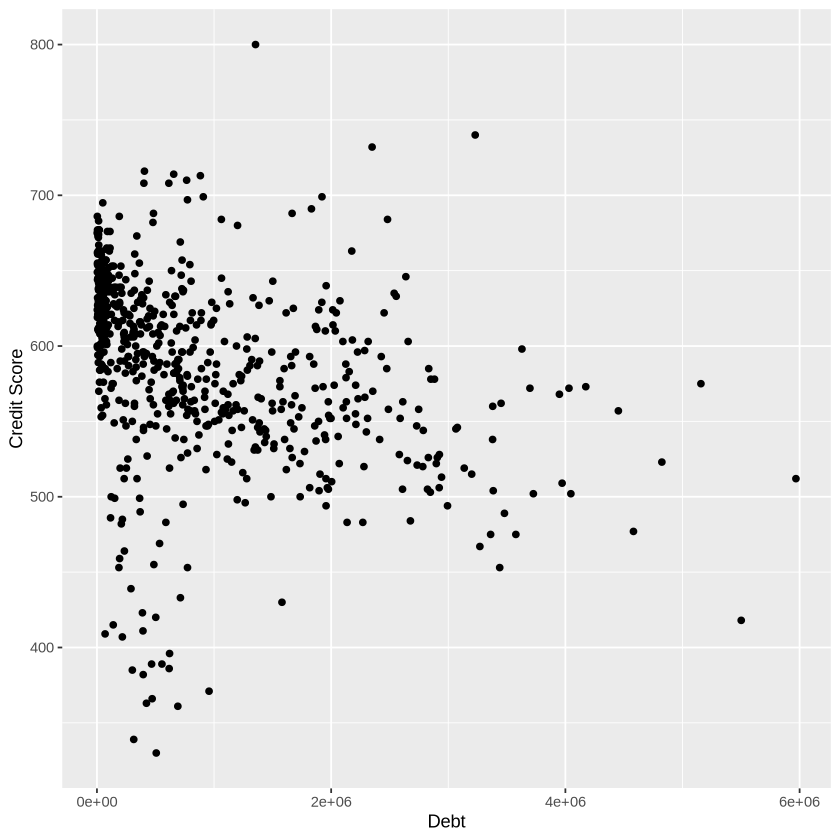

In [58]:
plot_debt <- ggplot(credit_training, aes(x = DEBT, y = CREDIT_SCORE)) +
    geom_point() +
    labs(x = "Debt",
         y = "Credit Score")
plot_debt